<h1 style="text-align: center;"><span style="color: #333399;">Intermediate Text Analysis: Pandas, NLTK, Pattern</span></h1>
<h6 style="text-align: center;">Created by: Michael Gagliano on 9/20/2018</h6>
<h6 style="text-align: center;">"K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.</h6>

# Requirements

- import **smallsample_tweet_from_azuredatafactory.csv** and complete all the cells below. If necessary, you can create more cells.

- Change the filename to **yourlastname_firstinitial_HW_Pandas_for_TextAnalytics**

- Use **df.head()**, not df

K-State Honor Code



Your Name: 

In [1]:
import pandas as pd
import csv
import re
from textblob import TextBlob

Import data and display five rows

In [2]:
df = pd.read_csv("data/smallsample_tweet_from_azuredatafactory.csv", encoding='cp1252')
pd.set_option('display.max_colwidth', -1)
df.head()

,tweet
0,This development is pretty exciting for me #supplychain #sustainability
1,Samsung assures excellent working conditions in China http://t.<br>co/9VcBIL1XAj #workingconditions #supplychain #responsiblesourcing #rtw
2,Loving the feedback that I am getting on this report today! #supplychain http://t.<br>co/7DJaJFFl
3,As parked 787s multiply? Boeing cash drain worries grow ... the future could be worse ... http://t.<br>co/up6V9sBYbi #supplychain
4,CHaINA Magazine: Apple Finds Child Labor Abuses in Its Supply Chain - As the controversy regarding. the situation is very bad ... http://t.<br>co/kt6MMXvng #SupplyChain


Find out data types and number of rows in the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 1 columns):
tweet    4514 non-null object
dtypes: object(1)
memory usage: 35.3+ KB


## Below, you need to transform / clean / analyse the tweets. 

- You can use more than one cell to respond to each requirement.
- After data transformation/cleaning/analysis, make sure to update the data (df)
- Display the first five rows after each data transformation/cleaning/analysis

### Data transformation & exploratory data analysis

Lowercase words (you need to **update** your data --> the tweets need to be lowercased)

In [4]:
df['tweet'] = df['tweet'].str.lower()
df.head()

,tweet
0,this development is pretty exciting for me #supplychain #sustainability
1,samsung assures excellent working conditions in china http://t.<br>co/9vcbil1xaj #workingconditions #supplychain #responsiblesourcing #rtw
2,loving the feedback that i am getting on this report today! #supplychain http://t.<br>co/7djajffl
3,as parked 787s multiply? boeing cash drain worries grow ... the future could be worse ... http://t.<br>co/up6v9sbybi #supplychain
4,chaina magazine: apple finds child labor abuses in its supply chain - as the controversy regarding. the situation is very bad ... http://t.<br>co/kt6mmxvng #supplychain


Create a column "retweet" and show "True" if tweet is retweet

In [5]:
df['rt'] = df['tweet']
df['rt'] = df.tweet.str.contains("^rt")
df[13:19]

,tweet,rt
13,#halloween my creepy candy caldron is ready thanks #biglots #pier1 #joann #trickortreat http://t.co/gbtfgtnohg,False
14,"if u can find a use for it, pier1 has them on sale. http://t.co/zocbkihfia",False
15,pier 1 always has the most adorable halloween decorations. - http://t.co/s9u0rt13kp,False
16,rt @birchwood01: http://t.co/kygxxve7xf http://t.co/kc2nws9zhg,True
17,hello @marketcall could i please mr. vialoux's seasonal perspective on pier1 $pir for an oct to march trade? seasonal trend past 5 yrs.,False
18,6 guideposts to omnichannel evolution via @pier1 @risnewsinsights #omnichannel #retail http://t.co/1dwvz9safc,False


In [6]:
df['rt'].value_counts()

False    3450
True     1064
Name: rt, dtype: int64

Find out how many reweets and how many original tweets in the data and display the analysis results below

In [7]:
rt_count = 0
og_count = 0
for i in df['rt']:
    if i == True:
        rt_count += 1
    else:
        og_count += 1
        
print('There are %d original tweets and %d retweets' %(og_count, rt_count))

There are 3450 original tweets and 1064 retweets


Show the percentage of "retweets" in the data and display the result below

In [8]:
print(rt_count/og_count * 100)

30.840579710144926


Find out the number of characters in each tweet and create a column "counts"

In [9]:
df['count'] = df['tweet'].str.len()
df.head()

,tweet,rt,count
0,this development is pretty exciting for me #supplychain #sustainability,False,71
1,samsung assures excellent working conditions in china http://t.<br>co/9vcbil1xaj #workingconditions #supplychain #responsiblesourcing #rtw,False,138
2,loving the feedback that i am getting on this report today! #supplychain http://t.<br>co/7djajffl,False,97
3,as parked 787s multiply? boeing cash drain worries grow ... the future could be worse ... http://t.<br>co/up6v9sbybi #supplychain,False,133
4,chaina magazine: apple finds child labor abuses in its supply chain - as the controversy regarding. the situation is very bad ... http://t.<br>co/kt6mmxvng #supplychain,False,169


Find out the number of words in each tweet and create a column "wordcount"

In [10]:
df['wordcount'] = df['tweet'].str.split().str.len() 
#Here we use the vectorised str.split to split on spaces and count the number of objects following the module via str.len()
df.head()

,tweet,rt,count,wordcount
0,this development is pretty exciting for me #supplychain #sustainability,False,71,9
1,samsung assures excellent working conditions in china http://t.<br>co/9vcbil1xaj #workingconditions #supplychain #responsiblesourcing #rtw,False,138,12
2,loving the feedback that i am getting on this report today! #supplychain http://t.<br>co/7djajffl,False,97,13
3,as parked 787s multiply? boeing cash drain worries grow ... the future could be worse ... http://t.<br>co/up6v9sbybi #supplychain,False,133,18
4,chaina magazine: apple finds child labor abuses in its supply chain - as the controversy regarding. the situation is very bad ... http://t.<br>co/kt6mmxvng #supplychain,False,169,24


Find the average word length and create a column "avgwordlen"

In [11]:
df['avgwordlen'] =  df['count']/df['wordcount']
df = df.round()
df.head()

,tweet,rt,count,wordcount,avgwordlen
0,this development is pretty exciting for me #supplychain #sustainability,False,71,9,8.0
1,samsung assures excellent working conditions in china http://t.<br>co/9vcbil1xaj #workingconditions #supplychain #responsiblesourcing #rtw,False,138,12,12.0
2,loving the feedback that i am getting on this report today! #supplychain http://t.<br>co/7djajffl,False,97,13,7.0
3,as parked 787s multiply? boeing cash drain worries grow ... the future could be worse ... http://t.<br>co/up6v9sbybi #supplychain,False,133,18,7.0
4,chaina magazine: apple finds child labor abuses in its supply chain - as the controversy regarding. the situation is very bad ... http://t.<br>co/kt6mmxvng #supplychain,False,169,24,7.0


Find the overall aveage of word length and display below

In [12]:
df['avgwordlen'].mean()

7.4517058041648205

Find hashtags and creat a column "hash"

In [13]:
df['hash'] = df.tweet.str.findall("(?<=#)\w+")
df.head()

,tweet,rt,count,wordcount,avgwordlen,hash
0,this development is pretty exciting for me #supplychain #sustainability,False,71,9,8.0,"[supplychain, sustainability]"
1,samsung assures excellent working conditions in china http://t.<br>co/9vcbil1xaj #workingconditions #supplychain #responsiblesourcing #rtw,False,138,12,12.0,"[workingconditions, supplychain, responsiblesourcing, rtw]"
2,loving the feedback that i am getting on this report today! #supplychain http://t.<br>co/7djajffl,False,97,13,7.0,[supplychain]
3,as parked 787s multiply? boeing cash drain worries grow ... the future could be worse ... http://t.<br>co/up6v9sbybi #supplychain,False,133,18,7.0,[supplychain]
4,chaina magazine: apple finds child labor abuses in its supply chain - as the controversy regarding. the situation is very bad ... http://t.<br>co/kt6mmxvng #supplychain,False,169,24,7.0,[supplychain]


Find the average number of hashtags per tweet and display it below

In [14]:
df['hash'].apply(', '.join)
df['hash'].str.len().mean()

0.7233052724856004

Find Twitter mentions (e.g., @cnn, @kstate_cba) and create a column "mentions"

In [15]:
df['mentions'] = df.tweet.str.findall("(?<=@)\w+")
df['mentions'] = df['mentions'].apply(', '.join)
df.head()

,tweet,rt,count,wordcount,avgwordlen,hash,mentions
0,this development is pretty exciting for me #supplychain #sustainability,False,71,9,8.0,"[supplychain, sustainability]",
1,samsung assures excellent working conditions in china http://t.<br>co/9vcbil1xaj #workingconditions #supplychain #responsiblesourcing #rtw,False,138,12,12.0,"[workingconditions, supplychain, responsiblesourcing, rtw]",
2,loving the feedback that i am getting on this report today! #supplychain http://t.<br>co/7djajffl,False,97,13,7.0,[supplychain],
3,as parked 787s multiply? boeing cash drain worries grow ... the future could be worse ... http://t.<br>co/up6v9sbybi #supplychain,False,133,18,7.0,[supplychain],
4,chaina magazine: apple finds child labor abuses in its supply chain - as the controversy regarding. the situation is very bad ... http://t.<br>co/kt6mmxvng #supplychain,False,169,24,7.0,[supplychain],


Find the average number of mentions per tweet and display it below

In [16]:
df['mentions'].str.split().str.len().mean()

0.924235711120957

Find out how many tweets contain the word "store" and display the analysis result

In [17]:
df['tweet'].str.contains("store").value_counts()

False    4167
True     347 
Name: tweet, dtype: int64

### Text cleaning 

Remove numbers in tweets and update the column

In [18]:
df['tweet'] = df['tweet'].str.replace('\d+', '')

Remove urls and the update the column

In [19]:
df['tweet'] = df['tweet'].str.replace('http\S+|www.\S+', '')

Remove non-alphabetic words & characters and update the column

In [20]:
df['tweet'] = df['tweet'].str.replace('[^a-zA-Z]+', ' ')

Remove short words (< 3) and update the column

In [21]:
df['tweet'] = df['tweet'].str.findall('\w{3,}').str.join(' ')
df.head()

,tweet,rt,count,wordcount,avgwordlen,hash,mentions
0,this development pretty exciting for supplychain sustainability,False,71,9,8.0,"[supplychain, sustainability]",
1,samsung assures excellent working conditions china workingconditions supplychain responsiblesourcing rtw,False,138,12,12.0,"[workingconditions, supplychain, responsiblesourcing, rtw]",
2,loving the feedback that getting this report today supplychain,False,97,13,7.0,[supplychain],
3,parked multiply boeing cash drain worries grow the future could worse supplychain,False,133,18,7.0,[supplychain],
4,chaina magazine apple finds child labor abuses its supply chain the controversy regarding the situation very bad supplychain,False,169,24,7.0,[supplychain],


Remove stopwords and update the column

In [22]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [23]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df.head()

,tweet,rt,count,wordcount,avgwordlen,hash,mentions
0,development pretty exciting supplychain sustainability,False,71,9,8.0,"[supplychain, sustainability]",
1,samsung assures excellent working conditions china workingconditions supplychain responsiblesourcing rtw,False,138,12,12.0,"[workingconditions, supplychain, responsiblesourcing, rtw]",
2,loving feedback getting report today supplychain,False,97,13,7.0,[supplychain],
3,parked multiply boeing cash drain worries grow future could worse supplychain,False,133,18,7.0,[supplychain],
4,chaina magazine apple finds child labor abuses supply chain controversy regarding situation bad supplychain,False,169,24,7.0,[supplychain],


Do lemmatization and update the column

In [24]:
import nltk

#Below function was from StackOverflow
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['tweet'] = df['tweet'].apply(lemmatize_text)
df['token_tweet'] = df['tweet'] #Duplicating this column where I can keep the nested list of tokens for Pattern Analysis below

df['tweet'] = df['tweet'].apply(', '.join) 
#Removed brackets for tokens. If we ran this prior to the column-duplicating line
#above we would not have access to the nested list of tokens to use for Pattern analysis
df.head()

,tweet,rt,count,wordcount,avgwordlen,hash,mentions,token_tweet
0,"development, pretty, exciting, supplychain, sustainability",False,71,9,8.0,"[supplychain, sustainability]",,"[development, pretty, exciting, supplychain, sustainability]"
1,"samsung, assures, excellent, working, condition, china, workingconditions, supplychain, responsiblesourcing, rtw",False,138,12,12.0,"[workingconditions, supplychain, responsiblesourcing, rtw]",,"[samsung, assures, excellent, working, condition, china, workingconditions, supplychain, responsiblesourcing, rtw]"
2,"loving, feedback, getting, report, today, supplychain",False,97,13,7.0,[supplychain],,"[loving, feedback, getting, report, today, supplychain]"
3,"parked, multiply, boeing, cash, drain, worry, grow, future, could, worse, supplychain",False,133,18,7.0,[supplychain],,"[parked, multiply, boeing, cash, drain, worry, grow, future, could, worse, supplychain]"
4,"chaina, magazine, apple, find, child, labor, abuse, supply, chain, controversy, regarding, situation, bad, supplychain",False,169,24,7.0,[supplychain],,"[chaina, magazine, apple, find, child, labor, abuse, supply, chain, controversy, regarding, situation, bad, supplychain]"


### Descriptive text analytics

Create a word cloud

In [25]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

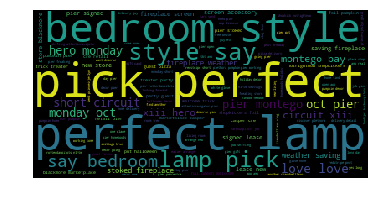

In [26]:
wordcloud = WordCloud().generate(' '.join(df['tweet']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Display top 10 words in the data

In [27]:
from collections import Counter

In [28]:
fdist = Counter(" ".join(df['tweet']).split(" ")).items()
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)
wordlist.rename(columns={0: 'word', 1: 'Freq'}, inplace = True)
wordlist.sort_values(by=['Freq'], ascending = False).head(10)

,word,Freq
60,"pier,",2791
70,"bedroom,",513
873,"pick,",512
102,"perfect,",508
1349,lamp,507
85,pier,475
817,"style,",469
1222,say,468
97,"amp,",412
1250,"fireplace,",390


### Sentiment analysis

Show the results of sentiment analysis (Using pattern Python package). I would be interested in how many positive / negative tweets are in the data. Create a column containing sentiment score.

In [29]:
from pattern.en import sentiment

In [30]:
positive_review = []
negative_review = []
neutral_review = []

for row in df['token_tweet']:
    review = row
    score = sentiment(review)
    if score[0] > 0:
        positive_review.append(review)
    elif score[0] == 0:
        neutral_review.append(review)
    else:
        negative_review.append(review)

In [31]:
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

1844
112
2558


Visit https://stackoverflow.com/questions/42907842/pandas-count-positive-negative-neutral-values and adapt the solution. If you choose to take a different approach, that would be just fine too.

How many positive / negative / neutral tweets?

In [32]:
#SEE ABOVE

In [33]:
#SEE ABOVE

What is the overall sentiment in the data? Average sentiment score

#### The overall sentiment would be positive tweets, based on the data. 

### I am unsure on how to take the each sentiment score (they are reported as tuples) and run the average of the polarity and subjectivity (x,y) values independently.

How do you like this HW? 

- A ^-^
- B
- C
- D
- F :-(